## Importations

In [1]:
import numpy as np
import pandas as pd

from sklearn import feature_selection
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing

from sklearn import ensemble
from sklearn import tree

from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_halving_search_cv

from utils import plot_confusion_matrix, print_feature_importance

## Data Loading

In [2]:
# load data
df = pd.read_csv("data.csv")
df.head()

,mean,median,variance,standard_deviation,skewness,kurtosis,energy,power,min,max,...,delta_delta_mfcc_13,delta_delta_mfcc_14,delta_delta_mfcc_15,delta_delta_mfcc_16,delta_delta_mfcc_17,delta_delta_mfcc_18,delta_delta_mfcc_19,delta_delta_mfcc_20,class,label
0,0.007175,-0.005000,0.003303,0.057475,0.773794,1.274474,26.839275,0.003355,-0.165512,0.357898,...,-0.114434,0.05602,-0.026329,-0.165784,0.190967,0.373702,-0.03957,-0.282994,0,normal
1,0.006852,-0.005121,0.003261,0.057102,0.755006,1.158208,26.460402,0.003308,-0.165512,0.357898,...,-0.114434,0.05602,-0.026329,-0.165784,0.190967,0.373702,-0.03957,-0.282994,0,normal
2,0.006899,-0.005412,0.003278,0.057252,0.752437,1.138386,26.603138,0.003325,-0.165477,0.356079,...,-0.114434,0.05602,-0.026329,-0.165784,0.190967,0.373702,-0.03957,-0.282994,0,normal
3,0.006747,-0.005653,0.003270,0.057184,0.765423,1.190150,26.523842,0.003315,-0.165427,0.334963,...,-0.114434,0.05602,-0.026329,-0.165784,0.190967,0.373702,-0.03957,-0.282994,0,normal
4,0.006691,-0.005481,0.003236,0.056890,0.733439,1.052088,26.249964,0.003281,-0.165427,0.327365,...,-0.114434,0.05602,-0.026329,-0.165784,0.190967,0.373702,-0.03957,-0.282994,0,normal


In [3]:
# load feature matrix, class vector, features list and labels from .csv file
X = df.drop(["class", "label"], axis=1).values
y = df["class"].values
FEATURES_LST = [column for column in df.columns if column not in ["class", "label"]]
labels = list(df["label"].unique())

## Data Normalization / Standardization

In [4]:
scaler = preprocessing.RobustScaler()
X = scaler.fit_transform(X)

## Data splitting into training and test sets

In [5]:
# splitting the data into training and test sets
TEST_SIZE = 0.20
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

## Cross-validation Configuration

In [6]:
# defining the cross-validation strategy
skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

## Classification and Results

### Decision Tree

In [7]:
# fitting the decision tree classifier
clf_tree = tree.DecisionTreeClassifier()
fdtree_cv_scores = model_selection.cross_val_score(clf_tree, X_train, y_train, cv=skf)

# fitting the decision tree classifier
trained_model_tree = clf_tree.fit(X_train, y_train)
y_pred_tree = trained_model_tree.predict(X_test)

# tree params
print(f"Tree Max Depth: {trained_model_tree.tree_.max_depth}")
print(f"Tree Leaves:    {trained_model_tree.tree_.n_leaves}")
print(f"--------------")

# cross-validation results
print(f"Acc per fold: {[f'{s:.4f}' for s in fdtree_cv_scores]}")
print(f"Mean accuracy: {fdtree_cv_scores.mean():.4f}")

Tree Max Depth: 38
Tree Leaves:    1246
--------------
Acc per fold: ['0.8511', '0.8560', '0.8609', '0.8551', '0.8580']
Mean accuracy: 0.8562


In [8]:
# printing feature importance (ordered by values)
print_feature_importance(FEATURES_LST, clf_tree.feature_importances_, order_by='values', ascending=False)

kurtosis:            0.1052
mfcc_1:              0.0830
median:              0.0811
mfcc_4:              0.0720
spectral_centroid:   0.0574
skewness:            0.0536
zero_crossing_rate:  0.0494
mfcc_3:              0.0489
root_mean_square:    0.0409
mfcc_5:              0.0319
energy:              0.0308
mfcc_2:              0.0241
mfcc_8:              0.0216
mean:                0.0190
standard_deviation:  0.0185
mfcc_9:              0.0156
mfcc_16:             0.0156
mfcc_7:              0.0143
mfcc_10:             0.0128
variance:            0.0118
mfcc_6:              0.0114
power:               0.0102
mfcc_15:             0.0099
mfcc_13:             0.0088
peak_to_peak:        0.0082
max:                 0.0066
mfcc_12:             0.0065
mfcc_11:             0.0052
spectral_flatness:   0.0052
mfcc_14:             0.0051
mfcc_19:             0.0050
min:                 0.0046
mfcc_20:             0.0045
delta_mfcc_4:        0.0045
delta_delta_mfcc_3:  0.0040
mfcc_17:            

Classification report:
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       105
           1       0.73      0.75      0.74       400
           2       0.93      0.90      0.92       682
           3       0.75      0.75      0.75       755
           4       0.88      0.90      0.89      1133
           5       0.93      0.92      0.93      1205

    accuracy                           0.86      4280
   macro avg       0.80      0.80      0.80      4280
weighted avg       0.86      0.86      0.86      4280



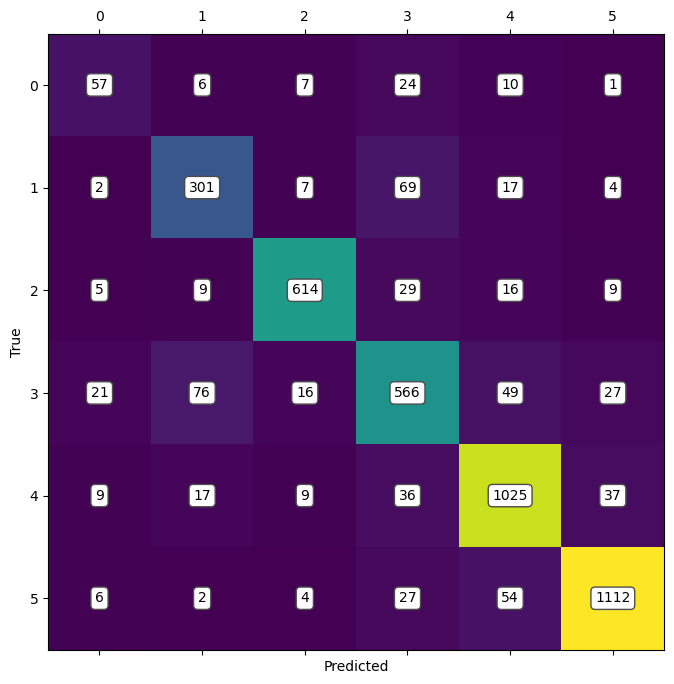

In [9]:
# printing classification report
print("Classification report:")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred_tree))

# plotting confusion matrix
plot_confusion_matrix(  y_true=y_test,
                        y_pred=y_pred_tree,
                        labels=list(set(y)),
                        color_map="viridis",
                        print_colorbar=False,
                        print_numbers=True,
                        print_boxes=True)

### Random Forest

In [15]:
# Setting classifiers and its configurations
classifiers = [
    {
        'preprocessing': [  preprocessing.RobustScaler()
                            ],
        'feature_selection': [  feature_selection.RFE(ensemble.RandomForestClassifier(), n_features_to_select=20)
                                ],
        'classifier': [ensemble.RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300, 400, 500],
        'classifier__bootstrap': [False],
        'classifier__criterion': ['gini', 'entropy']
    }
]

# Creating pipeline with a standard classifier
pipeline = Pipeline([
    ('preprocessing',       preprocessing.RobustScaler()),
    ('feature_selection',   feature_selection.RFE(ensemble.RandomForestClassifier(), n_features_to_select=20)),
    ('classifier',          ensemble.RandomForestClassifier())
])

# Creating GridSearchCV object
grid_search = model_selection.GridSearchCV(pipeline, classifiers, cv=5, n_jobs=-1)

# Fitting GridSearchCV to data
grid_search.fit(X_train, y_train)

# Results
print("Best parameters:",   grid_search.best_params_)
print("Best classifier:",   grid_search.best_estimator_)
print("Best score:",        grid_search.best_score_)

Best parameters: {'classifier': RandomForestClassifier(), 'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__n_estimators': 200, 'feature_selection': RFE(estimator=RandomForestClassifier(), n_features_to_select=20), 'preprocessing': RobustScaler()}
Best classifier: Pipeline(steps=[('preprocessing', RobustScaler()),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=20)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        n_estimators=200))])
Best score: 0.9527953597298101


In [18]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing', RobustScaler()),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=20)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        n_estimators=200))])

In [26]:
for i, score in enumerate(grid_search.cv_results_['split0_test_score']):
    print(f"Fold {i+1:2}: {score * 100:.4f} %")

Fold  1: 95.2395 %
Fold  2: 94.9474 %
Fold  3: 95.1227 %
Fold  4: 95.4731 %
Fold  5: 95.1811 %
Fold  6: 94.9474 %
Fold  7: 95.4147 %
Fold  8: 95.7360 %
Fold  9: 95.5315 %
Fold 10: 95.4439 %


In [19]:
print("Classification report:")
print(metrics.classification_report(y_true=y_test, y_pred=grid_search.best_estimator_.predict(X_test)))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.64      0.75       105
           1       0.92      0.90      0.91       400
           2       0.99      0.98      0.98       682
           3       0.87      0.91      0.89       755
           4       0.98      0.98      0.98      1133
           5       0.98      0.98      0.98      1205

    accuracy                           0.95      4280
   macro avg       0.94      0.90      0.92      4280
weighted avg       0.95      0.95      0.95      4280



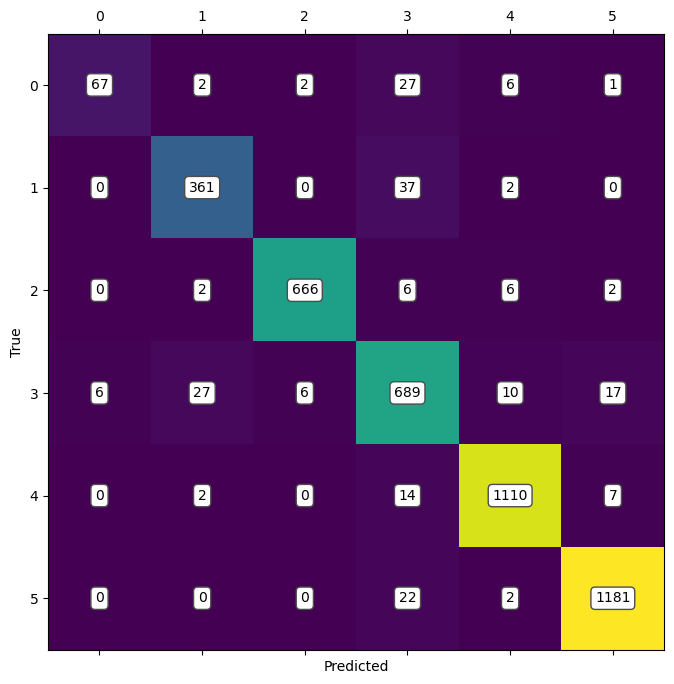

In [20]:
plot_confusion_matrix(  y_true=y_test,
                        y_pred=grid_search.best_estimator_.predict(X_test),
                        labels=list(set(y)),
                        color_map="viridis",
                        print_colorbar=False,
                        print_numbers=True,
                        print_boxes=True)